##Introduction

For this project, our objective is to build an optimal convolutional neural network to classify handwritten digits. We will use a built-in dataset, MNIST, provided by TensorFlow. The dataset contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

Source: [MNIST Digits Classification Dataset](https://keras.io/api/datasets/mnist/#:~:text=tf.keras.datasets.mnist.load_data%28path%3D%22mnist.npz%22%29%20Loads%20the%20MNIST%20dataset.%20This%20is%20a,along%20with%20a%20test%20set%20of%2010%2C000%20images.)

## Data Preparation

**1.Load the data using the following codes:**



Let's begin by loading the MNIST dataset into memory.

In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
#loading the MNIST digits classification dataset from Tensorflow Keras
mnist = tf.keras.datasets.mnist

In [ ]:
#splitting data into training and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#we are dividing the values by 255.0 to normalize the pixels so that they are within the range of 0 and 1, and to convert the values to floats
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
#checking shape of data
print(f'''
x_train shape: {x_train.shape}
y_train shape: {y_train.shape}
x_test shape:  {x_test.shape}
y_test shape:  {y_test.shape}
''')


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)



These are 3D arrays.

It's always good to check the data types, so let's see what they are for each variable.

In [ ]:
#checking data type of each variable
print(f'''
x_train data type: {x_train.dtype}
y_train data type: {y_train.dtype}
x_test data type:  {x_test.dtype}
y_test data type:  {y_test.dtype}
''')


x_train data type: float64
y_train data type: uint8
x_test data type:  float64
y_test data type:  uint8



Now let's look at the distribution of y_train.

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# displaying distribution
num, counts = np.unique(y_train, return_counts=True)

for value, count in zip(num, counts):
    print(f"{value}: {count}")

0: 5923
1: 6742
2: 5958
3: 6131
4: 5842
5: 5421
6: 5918
7: 6265
8: 5851
9: 5949


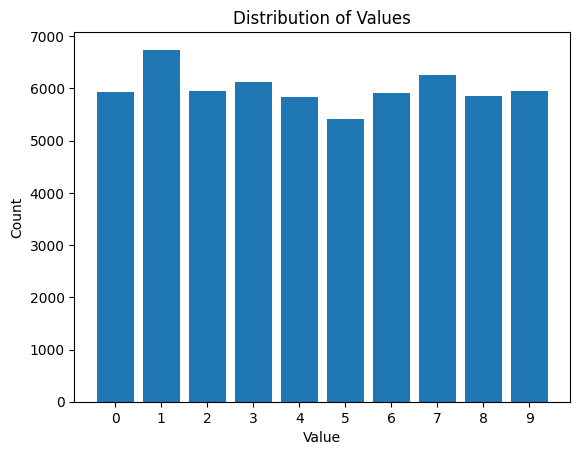

In [ ]:
# plotting distribution
plt.bar(num, counts)
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(num)
plt.title('Distribution of Values')
plt.show()

The dataset is imbalanced, so we will take that into consideration when evaluating the model.

As we saw, there are 60000 images in the train set and 10000 images in the test set, both of which are 28x28. We can also see that the x_train and x_test sets are 3D arrays; however, Keras Convolution 2D Layers only accept 4D arrays. To fix this issue, we must reshape the data. We will do so by adding the channel dimension.



In [ ]:
#reshaping the data
#each image is 28x28, so we will set the height and width to be those values
height, width = x_train.shape[1:]
x_train = x_train.reshape(x_train.shape[0], height, width, 1)
x_test = x_test.reshape(x_test.shape[0], height, width, 1)

In [ ]:
#checking new shape of data
print(f'''
x_train shape: {x_train.shape}
x_test shape:  {x_test.shape}
''')


x_train shape: (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)



Now, let's look at the pixel values. Pixel values fall within the range of 0 (black) and 255 (white); since we normalized these values earlier by dividing them by 255.0, they should fall within the range of 0 and 1.

In [ ]:
#checking pixel value range
import numpy as np
print(f'The minimum value of pixels = {np.amin(x_train[0])}; the maximum value of pixels ={np.amax(x_train[0])}' )

The minimum value of pixels = 0.0; the maximum value of pixels =1.0


Finally, let's visualize the first image to get an idea of the digits look like.

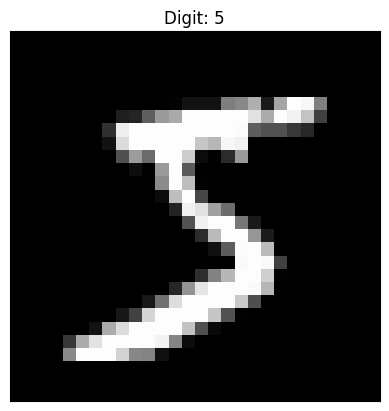

In [ ]:
#visualizing an image
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title(f'Digit: {y_train[0]}')
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)

##Building Convolutional Neural Networks

**2.Build the first model try different type of convolution and maxpooling layers.**

Now, let's create a convolution neural network to classify the digits.

In [ ]:
#creating first model
model = models.Sequential()

#adding first convolution layer
#since we reshaped the x_train set to be (60000,28,28,1), we can simply set the input_shape to be x_train[1:] so that it'll be (28,28,1)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= x_train.shape[1:]))

#adding the first max pooling layer; pooling window will be 2x2
model.add(layers.MaxPooling2D((2, 2)))

#adding second convolution layer; increasing # of filters from 32 to 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#adding second max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

#adding third convolution layer; increasing # of filters from 64 to 128
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

#adding third max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

#we need to change the dimensions of the output array to 2D to make it work with the classification algorithm, so we will add a flatten layer
model.add(layers.Flatten())

#adding layers for classification; layer will contain 128 neurons
model.add(layers.Dense(128, activation='relu'))

#adding dropout layer
model.add(layers.Dropout(0.3))

#since we have 10 labels, we need to have 10 neurons for the final output later; activation=None
model.add(layers.Dense(10))

#configuring model; since activation=None, from_logits must =True
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


**3.Print out the size of each layer of the model in step 2 using model summary function. What's the test error?**

Let's see the different sizes for each layer from the model we created.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

As we can see, the dimension sizes decreased as we added different layers. Let's evaluate the model by looking at the test error. To begin, we will train the model. We will implement early stopping while training the model since we have 110,474 paramaters. The training will stop if the validation accuracy does not improve for 3 epochs.

In [ ]:
%%time
#training the model and storing the history in a variable to plot later
#we will make the number of epochs short since training models for image classification can run for a long time
history = model.fit(x_train, y_train, epochs=20, verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 23s 8ms/step - loss: 0.2220 - accuracy: 0.9324
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0740 - accuracy: 0.9776
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0543 - accuracy: 0.9834
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0432 - accuracy: 0.9875
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0340 - accuracy: 0.9899
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9916
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0201 - accuracy: 0.9932
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0168 - accuracy: 0.9946
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

Next, we will create a line plot to visualize the model history.

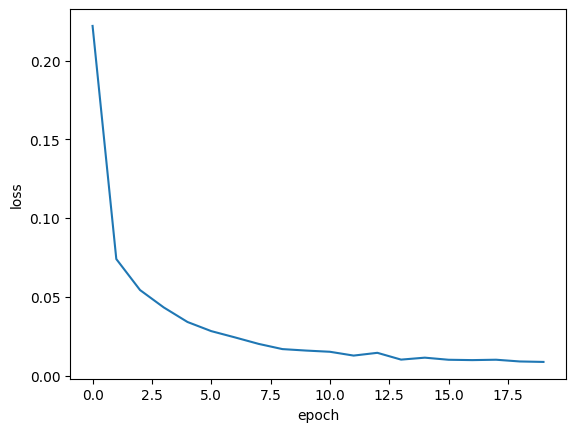

In [ ]:
#importing libraries
import seaborn as sns
import pandas as pd

#visualizing training history
train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#plotting training loss line plot
sns.lineplot(x='epoch', y ='loss', data =train_history)
#displaying line plot
plt.show()


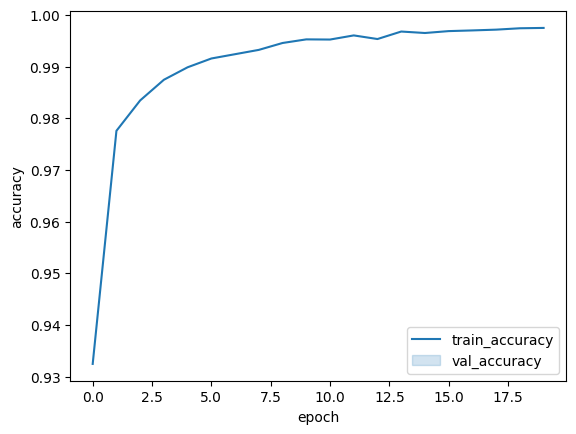

In [ ]:
#plotting training accuracy
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#adding legends
plt.legend(labels=['train_accuracy'])
#displaying line plot
plt.show()

In [ ]:
#calculating test error and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'''
Test Loss: {round(test_loss, 4)}
Test Accuracy: {round(test_acc, 4)}''')


Test Loss: 0.0679
Test Accuracy: 0.99


We have a really low test loss and high test accuracy, which means the model is performing very well. However the dataset is imbalanced so let's look at how well the model classifies each digit.

In [ ]:
from sklearn.metrics import classification_report
# creating the classification report
y_pred = model.predict(x_test)
y_pred = tf.nn.softmax(y_pred)
y_pred = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred)

# printing the classification report
print(report)

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



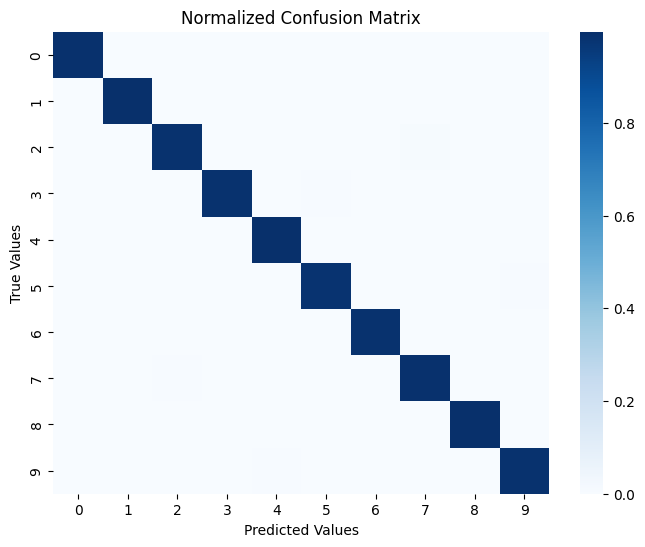

In [ ]:
# importing library
from sklearn.metrics import confusion_matrix

label_names = np.unique(y_test)

# creating confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')

# plotting normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Normalized Confusion Matrix')
plt.show()

The model performs well on the test data.

**4.Build a second model using different type of convolution and maxpooling layer. What's the test error?**

Let's create a new model with different arrangements of the convolution and maxpooling layers to see if we can achieve better results.

In [ ]:
#creating second model
model = models.Sequential()

#adding first convolution layer
#since we reshaped the x_train set to be (60000,28,28,1), we can simply set the input_shape to be x_train[1:] so that it'll be (28,28,1)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= x_train.shape[1:]))

#adding the first max pooling layer; pooling window will be 2x2
model.add(layers.MaxPooling2D((2, 2)))

#adding second convolution layer; increasing # of filters from 32 to 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#adding second max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

#adding third convolution layer; increasing # of filters from 64 to 128
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

#adding third max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

#we need to change the dimensions of the output array to 2D to make it work with the classification algorithm, so we will add a flatten layer
model.add(layers.Flatten())

#adding first layer for classification; layer will contain 128 neurons
model.add(layers.Dense(128, activation='relu'))

#adding first dropout layer
model.add(layers.Dropout(0.3))

#adding second layer for classification; layer will contain 64 neurons
model.add(layers.Dense(64, activation='relu'))

#adding second dropout layer
model.add(layers.Dropout(0.3))

#adding third layer for classification; layer will contain 64 neurons
model.add(layers.Dense(32, activation='relu'))

#adding third dropout layer
model.add(layers.Dropout(0.3))

#since we have 10 labels, we need to have 10 neurons for the final output later; activation=None
model.add(layers.Dense(10))

#configuring model; since activation=None, from_logits must =True
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

**5.Print out the size of each layer of the model in step 4 using model summary function. What's the test error?**


Let's see the different sizes for each layer from the model we created.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

We have slighly more paramaters to evaluate; so similar to before, we will train the model for 20 epochs since we have a large amount parameters. If the model does not improve for 3 epochs, we will stop the training. Then, we will look at the model's history.

In [ ]:
%%time
#adding early stopping; if the validation accuracy does not improve for 3 epochs, we will stop training
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience= 3)

#training the model and storing the history in a variable to plot later
#we will make the number of epochs short since training models for image classification can run for a long time
history = model.fit(x_train, y_train, epochs=20, callbacks=[callback], verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4320 - accuracy: 0.8698
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1325 - accuracy: 0.9685
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0991 - accuracy: 0.9773
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0794 - accuracy: 0.9819
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0689 - accuracy: 0.9842
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0595 - accuracy: 0.9869
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0518 - accuracy: 0.9879
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0430 - accuracy: 0.9898
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0412 - accuracy: 0.9903
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0

The model concluded at training at 12 epochs. So, let's visualize the model's history with line plots.

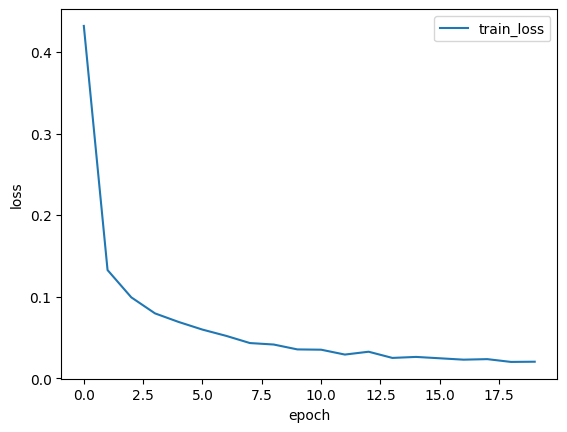

In [ ]:
#visualizing training history
train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#plotting training loss line plot
sns.lineplot(x='epoch', y ='loss', data =train_history)
#adding legends
plt.legend(labels=['train_loss'])
#displaying line plot
plt.show()

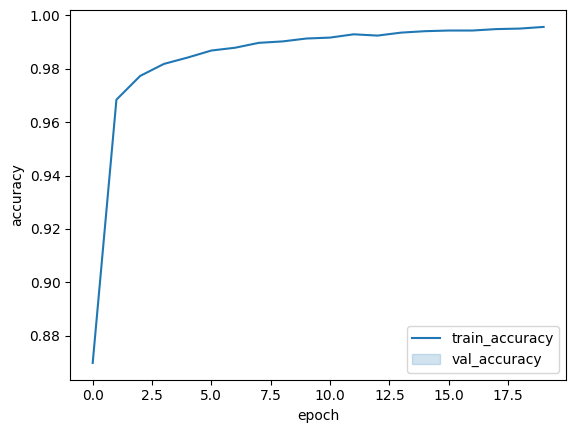

In [ ]:
#plotting training accuracy
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#adding legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])
#displaying line plot
plt.show()

Looking at the loss and accuracy plots, we can see that the model is performing similarly to the previous model. Let's calculate the model's overall test error and accuracy.

In [ ]:
#calculating test error and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'''
Test Loss: {round(test_loss, 4)}
Test Accuracy: {round(test_acc, 4)}''')


Test Loss: 0.1025
Test Accuracy: 0.9867


In [ ]:
# creating the classification report
y_pred = model.predict(x_test)
y_pred = tf.nn.softmax(y_pred)
y_pred = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred)

# printing the classification report
print(report)

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



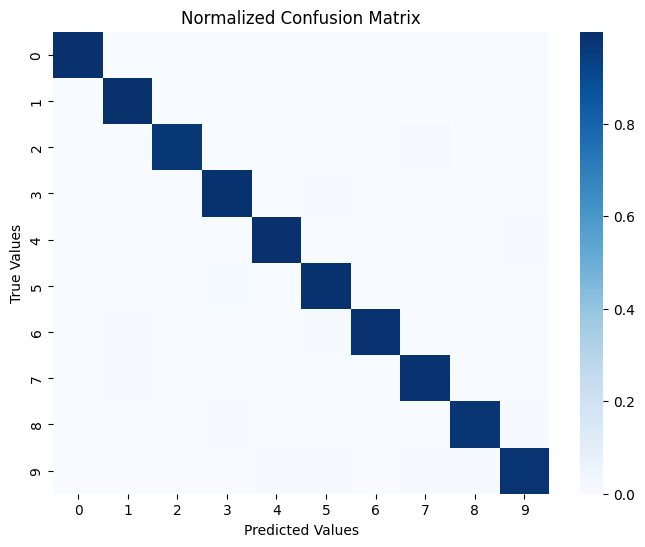

In [ ]:
# creating confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')

# plotting normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Normalized Confusion Matrix')
plt.show()

The model's performance is similar to the one before.